In [32]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [33]:
%cd /content/drive/MyDrive/apple_case_study

/content/drive/MyDrive/apple_case_study


In [34]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

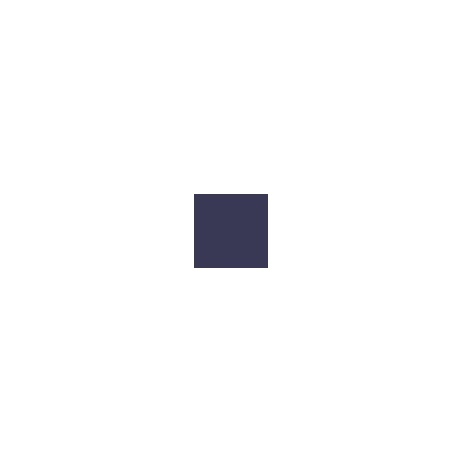

In [35]:
image = cv2.imread('squares/squares/train/a/0.jpg')
cv2_imshow(image)

In [36]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
# Threshold the image - segment white background from post it notes
_, thresh = cv2.threshold(gray, 250, 255, cv2.THRESH_BINARY_INV);
# Find the contours
contours, _ = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

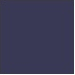

In [37]:
for contour in contours:
    area = cv2.contourArea(contour)
    # If the contour is not really small, or really big
    h,w = image.shape[0], image.shape[1]
    # Get the four corners of the contour
    x,y,w,h = cv2.boundingRect(contour)
    roi = image[y:y+h, x:x+h]
    cv2_imshow(roi)

    mean_blue = np.mean(roi[:,:,0])
    mean_green = np.mean(roi[:,:,1])
    mean_red = np.mean(roi[:,:,2]) 


In [38]:
import pandas as pd

In [39]:
train_csv_filename = "train.csv"
test_csv_filename = "test.csv"

In [40]:
train_df = pd.read_csv (train_csv_filename)
test_df = pd.read_csv (test_csv_filename)

In [41]:
print(train_df.head)

<bound method NDFrame.head of              Red        Blue       Green  Class
0      62.474133   62.066489   88.963200      1
1      27.040089   28.030702   57.777470      1
2      67.966000   67.202800   94.226400      1
3     248.000000  248.000000  248.000000      1
4      49.999923   49.999923   49.999923      1
...          ...         ...         ...    ...
1495  178.059556  179.040000  183.859911      3
1496  153.332400  153.246800  202.197600      3
1497  230.763642  229.967949  184.553583      3
1498  182.015721  181.077064  194.905575      3
1499  170.165713  171.101457  188.865505      3

[1500 rows x 4 columns]>


In [42]:
X_train = train_df.drop('Class', axis=1)
y_train = train_df['Class']
X_test = test_df.drop('Class', axis=1)
y_test = test_df['Class']

In [53]:
# Linear SVM
from sklearn.svm import SVC
svclassifier_linear = SVC(kernel='linear')
svclassifier_linear.fit(X_train, y_train)

y_pred_linear = svclassifier_linear.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred_linear))
print(classification_report(y_test,y_pred_linear))

[[340   0 160]
 [288  39 173]
 [  0  34 466]]
              precision    recall  f1-score   support

           1       0.54      0.68      0.60       500
           2       0.53      0.08      0.14       500
           3       0.58      0.93      0.72       500

    accuracy                           0.56      1500
   macro avg       0.55      0.56      0.49      1500
weighted avg       0.55      0.56      0.49      1500



In [52]:
# Polynomial Kernel SVM
from sklearn.svm import SVC
svclassifier_poly = SVC(kernel='poly', degree=8)
svclassifier_poly.fit(X_train, y_train)

y_pred_poly = svclassifier_poly.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred_poly))
print(classification_report(y_test, y_pred_poly))

[[339 161   0]
 [ 51 341 108]
 [  0 233 267]]
              precision    recall  f1-score   support

           1       0.87      0.68      0.76       500
           2       0.46      0.68      0.55       500
           3       0.71      0.53      0.61       500

    accuracy                           0.63      1500
   macro avg       0.68      0.63      0.64      1500
weighted avg       0.68      0.63      0.64      1500



In [54]:
# Gaussian Kernel SVM
from sklearn.svm import SVC
svclassifier_gauss = SVC(kernel='rbf')
svclassifier_gauss.fit(X_train, y_train)

y_pred_gauss = svclassifier_gauss.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred_gauss))
print(classification_report(y_test, y_pred_gauss))

[[338 162   0]
 [ 11 482   7]
 [  0  97 403]]
              precision    recall  f1-score   support

           1       0.97      0.68      0.80       500
           2       0.65      0.96      0.78       500
           3       0.98      0.81      0.89       500

    accuracy                           0.82      1500
   macro avg       0.87      0.82      0.82      1500
weighted avg       0.87      0.82      0.82      1500



In [55]:
# Sigmoid Kernel SVM
from sklearn.svm import SVC
svclassifier_sigmoid = SVC(kernel='sigmoid')
svclassifier_sigmoid.fit(X_train, y_train)


y_pred_sigmoid = svclassifier_sigmoid.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred_sigmoid))
print(classification_report(y_test, y_pred_sigmoid))

[[160   0 340]
 [173   0 327]
 [405   0  95]]
              precision    recall  f1-score   support

           1       0.22      0.32      0.26       500
           2       0.00      0.00      0.00       500
           3       0.12      0.19      0.15       500

    accuracy                           0.17      1500
   macro avg       0.11      0.17      0.14      1500
weighted avg       0.11      0.17      0.14      1500



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [56]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

[[459  41   0]
 [129 365   6]
 [ 62  34 404]]
              precision    recall  f1-score   support

           1       0.71      0.92      0.80       500
           2       0.83      0.73      0.78       500
           3       0.99      0.81      0.89       500

    accuracy                           0.82      1500
   macro avg       0.84      0.82      0.82      1500
weighted avg       0.84      0.82      0.82      1500



Text(0, 0.5, 'Mean Error')

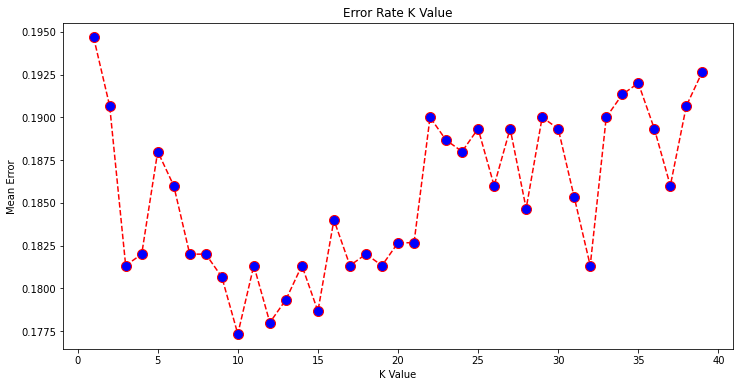

In [68]:
# KNN
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
classifier_knn = KNeighborsClassifier(n_neighbors=3)
classifier_knn.fit(X_train, y_train)

y_pred_knn = classifier_knn.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))

error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

In [69]:
# One-Vs-Rest for Multi-Class Classification
from sklearn.linear_model import LogisticRegression
model_ovr1 = LogisticRegression(multi_class='ovr')
model_ovr1.fit(X_train, y_train)

ypred_ovr1 = model_ovr1.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, ypred_ovr1))
print(classification_report(y_test, ypred_ovr1))

[[340   0 160]
 [304  20 176]
 [  0  99 401]]
              precision    recall  f1-score   support

           1       0.53      0.68      0.59       500
           2       0.17      0.04      0.06       500
           3       0.54      0.80      0.65       500

    accuracy                           0.51      1500
   macro avg       0.41      0.51      0.44      1500
weighted avg       0.41      0.51      0.44      1500



In [71]:
# One-Vs-Rest for Multi-Class Classification
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
model_lr2 = LogisticRegression()
model_ovr2 = OneVsRestClassifier(model_lr2)
model_ovr2.fit(X_train, y_train)
ypred_ovr2 = model_ovr2.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, ypred_ovr2))
print(classification_report(y_test, ypred_ovr2))

[[340   0 160]
 [304  20 176]
 [  0  99 401]]
              precision    recall  f1-score   support

           1       0.53      0.68      0.59       500
           2       0.17      0.04      0.06       500
           3       0.54      0.80      0.65       500

    accuracy                           0.51      1500
   macro avg       0.41      0.51      0.44      1500
weighted avg       0.41      0.51      0.44      1500



In [72]:
# One-Vs-One for Multi-Class Classification
from sklearn.svm import SVC
model_ovo1 = SVC(decision_function_shape='ovo')
model_ovo1.fit(X_train, y_train)

ypred_ovo1 = model_ovo1.predict(X_train)

from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, ypred_ovo1))
print(classification_report(y_test, ypred_ovo1))

[[333 167   0]
 [  9 476  15]
 [  0 105 395]]
              precision    recall  f1-score   support

           1       0.97      0.67      0.79       500
           2       0.64      0.95      0.76       500
           3       0.96      0.79      0.87       500

    accuracy                           0.80      1500
   macro avg       0.86      0.80      0.81      1500
weighted avg       0.86      0.80      0.81      1500



In [74]:
# One-Vs-One for Multi-Class Classification
from sklearn.svm import SVC
from sklearn.multiclass import OneVsOneClassifier
model_svm2 = SVC()
model_ovo2 = OneVsOneClassifier(model_svm2)
model_ovo2.fit(X_train, y_train)

ypred_ovo2 = model_ovo2.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, ypred_ovo2))
print(classification_report(y_test, ypred_ovo2))

[[338 162   0]
 [ 12 483   5]
 [  0  97 403]]
              precision    recall  f1-score   support

           1       0.97      0.68      0.80       500
           2       0.65      0.97      0.78       500
           3       0.99      0.81      0.89       500

    accuracy                           0.82      1500
   macro avg       0.87      0.82      0.82      1500
weighted avg       0.87      0.82      0.82      1500



In [75]:
import seaborn as sns

Accuracy is:  0.806


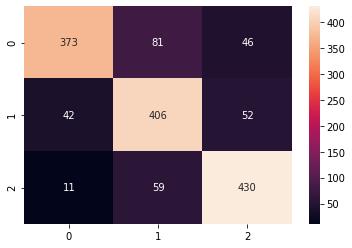

In [76]:
# Feature selection with correlation and random forest classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.metrics import accuracy_score

#random forest classifier with n_estimators=10 (default)
clf_rf = RandomForestClassifier(random_state=43)      
clr_rf = clf_rf.fit(X_train,y_train)

ac = accuracy_score(y_test,clf_rf.predict(X_test))
print('Accuracy is: ',ac)
cm = confusion_matrix(y_test,clf_rf.predict(X_test))
sns.heatmap(cm,annot=True,fmt="d")

Accuracy is:  0.804


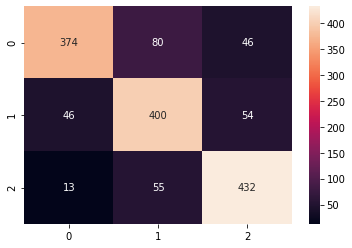

In [82]:
# Univariate feature selection and random forest classification
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
# find best scored 5 features
select_feature = SelectKBest(chi2, k=3).fit(X_train, y_train)

X_train_2 = select_feature.transform(X_train)
X_test_2 = select_feature.transform(X_test)
#random forest classifier with n_estimators=10 (default)
clf_rf_2 = RandomForestClassifier()      
clr_rf_2 = clf_rf_2.fit(X_train_2,y_train)
ac_2 = accuracy_score(y_test,clf_rf_2.predict(X_test_2))
print('Accuracy is: ',ac_2)
cm_2 = confusion_matrix(y_test,clf_rf_2.predict(X_test_2))
sns.heatmap(cm_2,annot=True,fmt="d")

Accuracy is:  0.8033333333333333


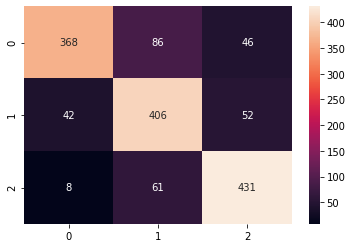

In [83]:
# Recursive feature elimination (RFE) with random forest
from sklearn.feature_selection import RFE
# Create the RFE object and rank each pixel
clf_rf_3 = RandomForestClassifier()      
rfe = RFE(estimator=clf_rf_3, n_features_to_select=5, step=1)
rfe = rfe.fit(X_train, y_train)
ac_3 = accuracy_score(y_test,rfe.predict(X_test_2))
print('Accuracy is: ',ac_3)
cm_3 = confusion_matrix(y_test,rfe.predict(X_test_2))
sns.heatmap(cm_3,annot=True,fmt="d")

Accuracy is:  0.8033333333333333


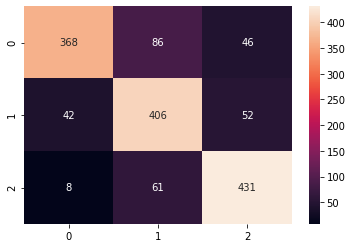

In [84]:
# Recursive feature elimination with cross validation and random forest classification
from sklearn.feature_selection import RFECV

# The "accuracy" scoring is proportional to the number of correct classifications
clf_rf_4 = RandomForestClassifier() 
rfecv = RFECV(estimator=clf_rf_4, step=1, cv=5,scoring='accuracy')   #5-fold cross-validation
rfecv = rfecv.fit(X_train, y_train)

ac_4 = accuracy_score(y_test,rfe.predict(X_test))
print('Accuracy is: ',ac_4)
cm_4 = confusion_matrix(y_test,rfe.predict(X_test))
sns.heatmap(cm_4,annot=True,fmt="d")

Accuracy is:  0.8033333333333333
Feature ranking:
1. feature 2 (0.539987)
2. feature 1 (0.238928)
3. feature 0 (0.221085)


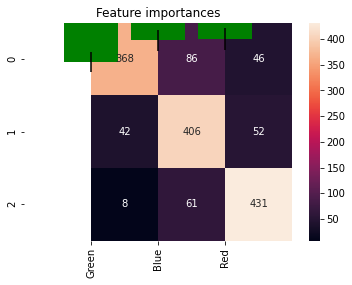

In [87]:
# Tree based feature selection and random forest classification
clf_rf_5 = RandomForestClassifier()      
clr_rf_5 = clf_rf_5.fit(X_train,y_train)

ac_5 = accuracy_score(y_test,rfe.predict(X_test))
print('Accuracy is: ',ac_5)
cm_5 = confusion_matrix(y_test,rfe.predict(X_test))
sns.heatmap(cm_5,annot=True,fmt="d")

importances = clr_rf_5.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf_rf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest

plt.figure(1, figsize=(14, 13))
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices],
       color="g", yerr=std[indices], align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns[indices],rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()